# Chest X-Ray for Pneumonia
Pneumonia, a common respiratory infection, can affect anyone, from infants to the elderly. It occurs when the air sacs in the lungs become inflamed and filled with fluid or pus, leading to symptoms such as cough, fever, and difficulty breathing
# What is pneumonia?
Pneumonia is an inflammatory condition of the lungs primarily caused by infectious agents, including bacteria, viruses, and fungi. The infection can spread through inhalation of airborne pathogens or aspiration of oral secretions into the lungs.

Common symptoms of pneumonia include cough, fever, chills, chest pain, and difficulty breathing. Individuals with weakened immune systems, chronic lung diseases, or underlying health conditions are at a higher risk of developing pneumonia. If left untreated, pneumonia can lead to complications such as pleural effusion, respiratory failure, or sepsis.

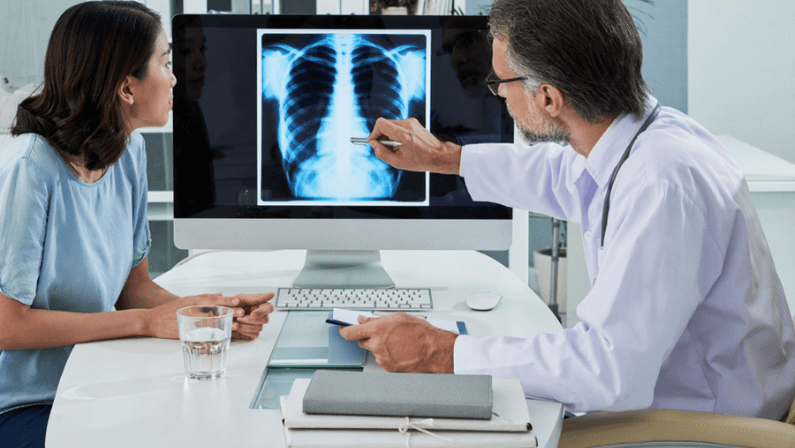

# Can chest X-rays accurately diagnose pneumonia?
Yes, chest X-rays are an essential tool in diagnosing pneumonia. They can detect signs of pneumonia on chest X-rays or characteristic abnormalities, such as infiltrates and consolidations in the lungs, which are indicative of pneumonia.

However, in some cases, additional tests like blood cultures, sputum samples, or pathology testing might be required to confirm the diagnosis, particularly if the X-ray results are inconclusive.

The process of pathology testing has become more convenient with the availability of online options. If pneumonia is suspected, it’s crucial to consult a healthcare professional for a thorough evaluation.

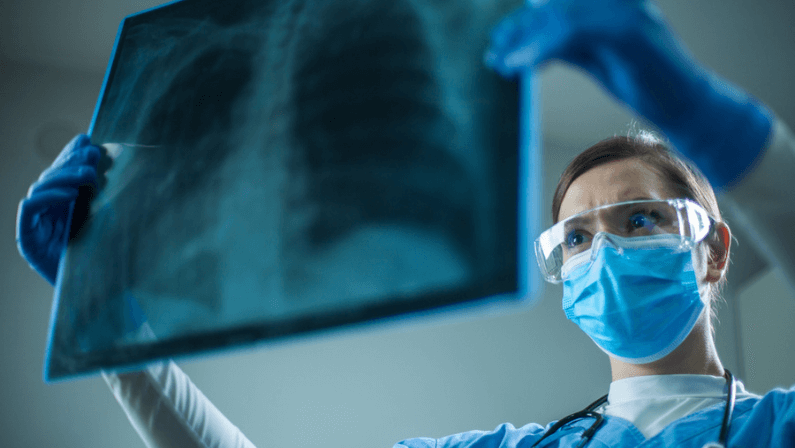



# Use the Kaggle API in Google Colab
`````````````````````````````````````````````````````````````````````



In [ ]:
# Install Kaggle API
!pip install kaggle

# Upload the Kaggle API key
from google.colab import files
files.upload()  # Select and upload your kaggle.json file

# Move the API key to the Kaggle folder
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for the API key
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


# Download the Dataset
After setting up the Kaggle API key, download the dataset using the command below

In [5]:
# Download the Chest X-Ray Images (Pneumonia) dataset
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:19<00:00, 156MB/s]
100% 2.29G/2.29G [00:20<00:00, 123MB/s]


# Unzip the Dataset
Unzip the dataset to access the images

In [6]:
# Unzip the downloaded dataset
!unzip chest-xray-pneumonia.zip


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

#  Load and Preprocess the Dataset
We will:

Load the dataset images.
Resize all images to 224x224.
Normalize the pixel values to a range of [0, 1].
Divide the dataset into training, validation, and testing sets.

# Data Preprocessing

In [25]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Define dataset paths
dataset_dir = "./chest_xray/"
train_dir = os.path.join(dataset_dir, "train")
val_dir = os.path.join(dataset_dir, "val")
test_dir = os.path.join(dataset_dir, "test")

# Load datasets and resize images to 224x224
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_dataset = image_dataset_from_directory(train_dir,
                                             image_size=IMG_SIZE,
                                             batch_size=BATCH_SIZE,
                                             label_mode='binary')

val_dataset = image_dataset_from_directory(val_dir,
                                           image_size=IMG_SIZE,
                                           batch_size=BATCH_SIZE,
                                           label_mode='binary')

test_dataset = image_dataset_from_directory(test_dir,
                                            image_size=IMG_SIZE,
                                            batch_size=BATCH_SIZE,
                                            label_mode='binary')

# Normalize pixel values to [0, 1]
def normalize_img(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize_img)
val_dataset = val_dataset.map(normalize_img)
test_dataset = test_dataset.map(normalize_img)

# Optional: Prefetch to optimize loading speed
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Verify dataset shapes
for images, labels in train_dataset.take(1):
    print(f"Training set: {images.shape}, {labels.shape}")
for images, labels in val_dataset.take(1):
    print(f"Validation set: {images.shape}, {labels.shape}")
for images, labels in test_dataset.take(1):
    print(f"Test set: {images.shape}, {labels.shape}")


Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Training set: (32, 224, 224, 3), (32, 1)
Validation set: (16, 224, 224, 3), (16, 1)
Test set: (32, 224, 224, 3), (32, 1)


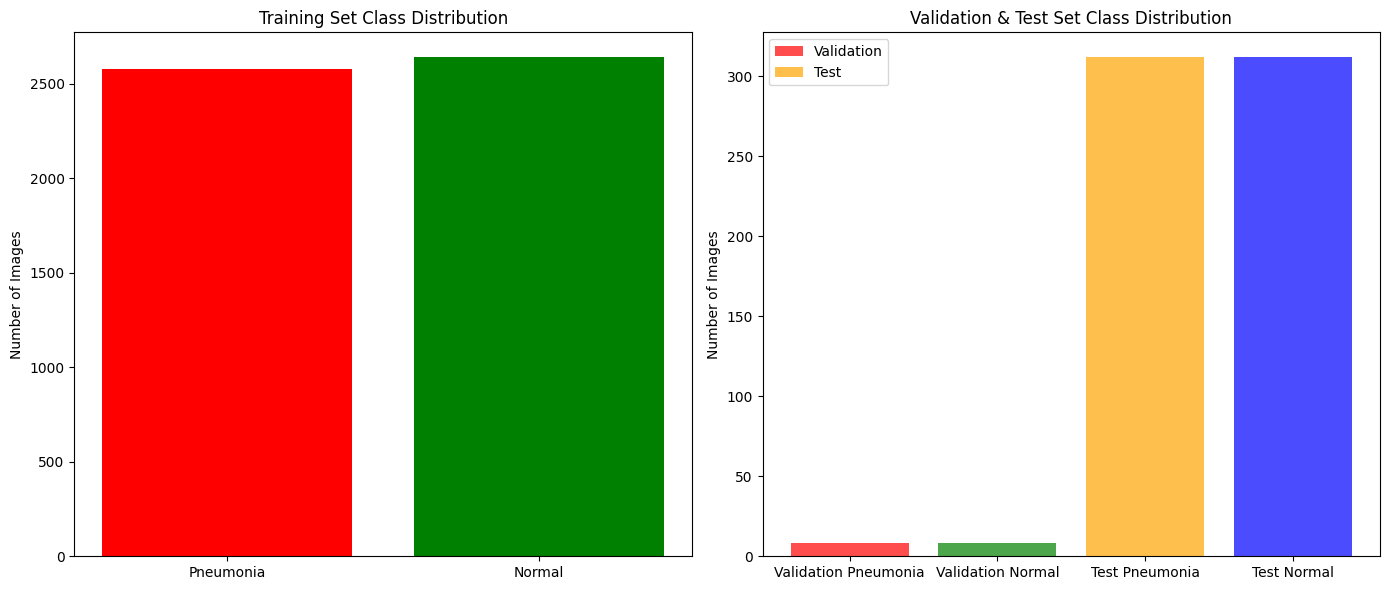

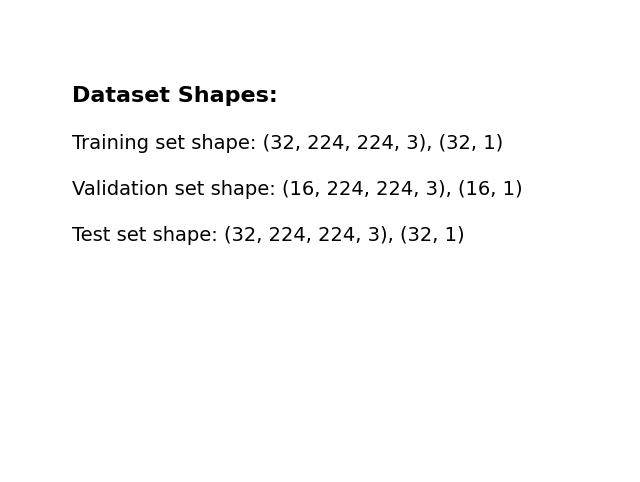

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
train_size = 5216
val_size = 16
test_size = 624

# Class distribution in each dataset
train_pneumonia = 2576  # Example number of pneumonia images in the training set
train_normal = 2640  # Example number of normal images in the training set
val_pneumonia = 8
val_normal = 8
test_pneumonia = 312
test_normal = 312

# Bar Chart for Class Distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting for training set class distribution
ax[0].bar(["Pneumonia", "Normal"], [train_pneumonia, train_normal], color=["red", "green"])
ax[0].set_title('Training Set Class Distribution')
ax[0].set_ylabel('Number of Images')

# Plotting for validation and test set class distribution
ax[1].bar(["Validation Pneumonia", "Validation Normal"], [val_pneumonia, val_normal], color=["red", "green"], alpha=0.7, label="Validation")
ax[1].bar(["Test Pneumonia", "Test Normal"], [test_pneumonia, test_normal], color=["orange", "blue"], alpha=0.7, label="Test")

ax[1].set_title('Validation & Test Set Class Distribution')
ax[1].set_ylabel('Number of Images')
ax[1].legend()

plt.tight_layout()
plt.show()

# Visualize the dataset shapes as text
fig, ax = plt.subplots(figsize=(8, 6))
dataset_shapes = {
    "Training set shape": "(32, 224, 224, 3), (32, 1)",
    "Validation set shape": "(16, 224, 224, 3), (16, 1)",
    "Test set shape": "(32, 224, 224, 3), (32, 1)"
}

ax.axis('off')
ax.text(0.1, 0.8, f"Dataset Shapes:", fontsize=16, fontweight='bold')
for i, (dataset, shape) in enumerate(dataset_shapes.items()):
    ax.text(0.1, 0.7-i*0.1, f"{dataset}: {shape}", fontsize=14)

plt.show()


# Data Augmentation
For data augmentation, we will apply techniques such as:

Random rotation
Random flipping (horizontal and vertical)
Zooming
Random cropping
This helps improve the model's generalization ability and avoid overfitting.

# Data Augmentation

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator for augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images
    rotation_range=30,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Random shear
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Fill mode for pixels outside the image
)

# Apply the generator to the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Validation and test data do not need augmentation, only normalization
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


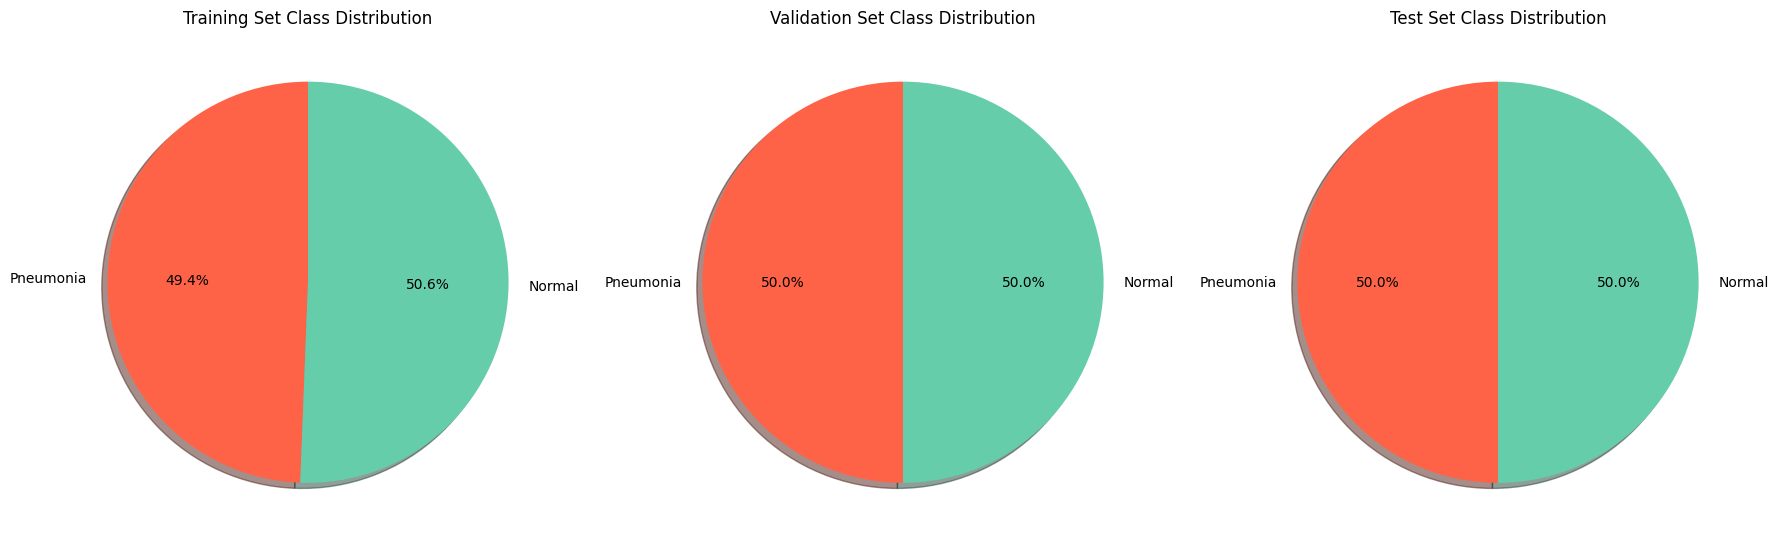

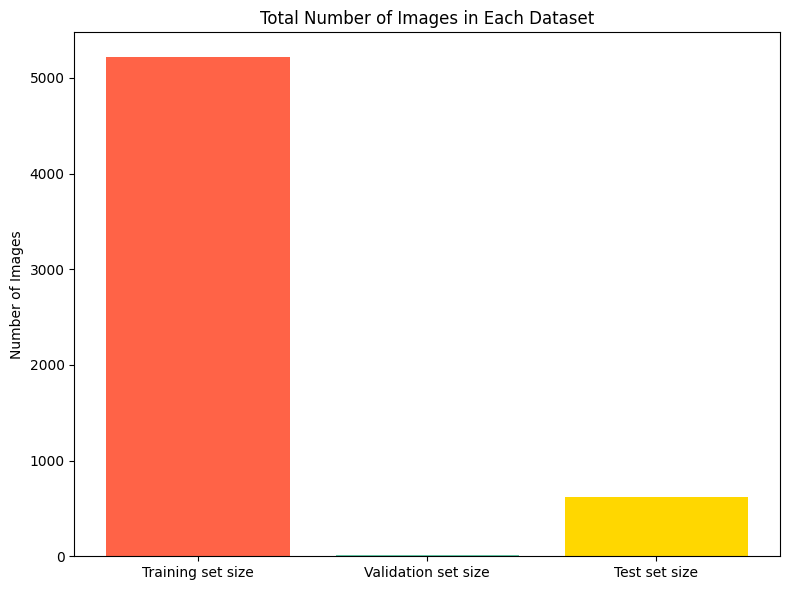

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
train_size = 5216
val_size = 16
test_size = 624

# Class distribution in each dataset (these are just sample values, adjust based on your dataset)
train_pneumonia = 2576
train_normal = 2640
val_pneumonia = 8
val_normal = 8
test_pneumonia = 312
test_normal = 312

# Pie chart for the Training Set
labels_train = ['Pneumonia', 'Normal']
sizes_train = [train_pneumonia, train_normal]
colors_train = ['#FF6347', '#66CDAA']  # Tomato and Medium Aquamarine

# Pie chart for the Validation Set
labels_val = ['Pneumonia', 'Normal']
sizes_val = [val_pneumonia, val_normal]
colors_val = ['#FF6347', '#66CDAA']

# Pie chart for the Test Set
labels_test = ['Pneumonia', 'Normal']
sizes_test = [test_pneumonia, test_normal]
colors_test = ['#FF6347', '#66CDAA']

# Creating subplots to show each pie chart
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Training set pie chart
ax[0].pie(sizes_train, labels=labels_train, autopct='%1.1f%%', startangle=90, colors=colors_train, shadow=True)
ax[0].set_title('Training Set Class Distribution')

# Validation set pie chart
ax[1].pie(sizes_val, labels=labels_val, autopct='%1.1f%%', startangle=90, colors=colors_val, shadow=True)
ax[1].set_title('Validation Set Class Distribution')

# Test set pie chart
ax[2].pie(sizes_test, labels=labels_test, autopct='%1.1f%%', startangle=90, colors=colors_test, shadow=True)
ax[2].set_title('Test Set Class Distribution')

plt.tight_layout()
plt.show()

# Visualizing the dataset sizes (optional)
fig, ax = plt.subplots(figsize=(8, 6))
dataset_sizes = {
    "Training set size": train_size,
    "Validation set size": val_size,
    "Test set size": test_size
}

ax.bar(dataset_sizes.keys(), dataset_sizes.values(), color=['#FF6347', '#66CDAA', '#FFD700'])
ax.set_title('Total Number of Images in Each Dataset')
ax.set_ylabel('Number of Images')

plt.tight_layout()
plt.show()


# Model Development:
In this step, we'll either implement a custom Convolutional Neural Network (CNN) or fine-tune a pre-trained model (e.g., MobileNet, InceptionV3) for pneumonia detection.

# Fine-tuning the MobileNetV2 model

In [27]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load pre-trained MobileNetV2 model without the top classification layer
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model layers to prevent them from being trained
base_model.trainable = False

# Create a custom model on top of the pre-trained base model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Global Average Pooling
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer and binary cross-entropy loss
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model to visualize the architecture
model.summary()

# Train the model with the augmented data
history = model.fit(
    train_generator,
    epochs=10,  # You can change the number of epochs as required
    validation_data=val_generator
)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,570,753 (13.62 MB)

 Trainable params: 1,312,769 (5.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.8116 - loss: 0.4345 - val_accuracy: 0.9375 - val_loss: 0.2709
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.9188 - loss: 0.1927 - val_accuracy: 0.8750 - val_loss: 0.2965
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.9205 - loss: 0.1929 - val_accuracy: 0.8125 - val_loss: 0.3065
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.9380 - loss: 0.1601 - val_accuracy: 0.7500 - val_loss: 0.2775
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.9451 - loss: 0.1406 - val_accuracy: 0.8125 - val_loss: 0.2936
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 380s 2s/step - accuracy: 0.9410 - loss: 0.1448 - val_accuracy: 0.9375 - val_loss: 0.2411
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.9476 - loss: 0.1229 - val_accuracy: 0.8750 - val_loss: 0.2481
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 388s 2s/step - accuracy: 0.9504 - loss: 0.1232 - val_accuracy: 0.812

In [29]:
model.save('pneumonia_detection_model.keras')



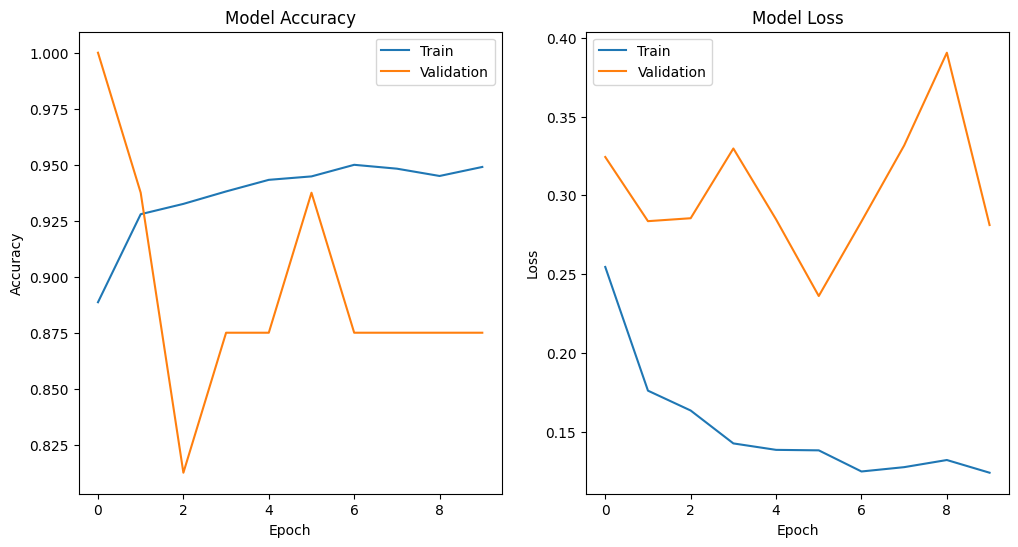

In [ ]:
import matplotlib.pyplot as plt

# History object contains the metrics from the training process
history = model.history

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


# Evaluate the model

20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step
Confusion Matrix:
 [[ 70 164]
 [132 258]]


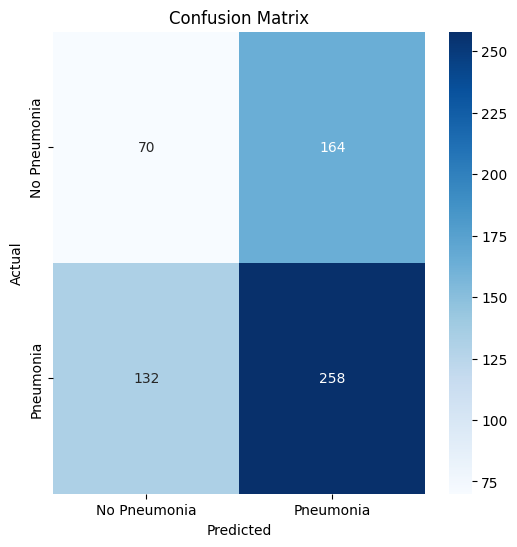

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.30      0.32       234
           1       0.61      0.66      0.64       390

    accuracy                           0.53       624
   macro avg       0.48      0.48      0.48       624
weighted avg       0.51      0.53      0.52       624

ROC-AUC Score: 0.4971619548542625


In [ ]:
# Assuming the test data is loaded using ImageDataGenerator as test_generator
predictions = model.predict(test_generator)
predicted_classes = (predictions > 0.5).astype("int32")  # Convert probabilities to class labels

# Step 2: Confusion Matrix
cm = confusion_matrix(test_generator.classes, predicted_classes)
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Pneumonia', 'Pneumonia'], yticklabels=['No Pneumonia', 'Pneumonia'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Step 3: Classification Report (Sensitivity, Specificity, etc.)
print("Classification Report:\n", classification_report(test_generator.classes, predicted_classes))

# Step 4: ROC-AUC Score
roc_auc = roc_auc_score(test_generator.classes, predictions)
print("ROC-AUC Score:", roc_auc)


# Compare results on augmented vs. non-augmented datasets.

In [3]:
import os

# Check current directory
print("Current Directory:", os.getcwd())

# Check if 'data/train' exists
print("Does 'data/train' exist?", os.path.exists('data/train'))

# List files in the current directory to verify the dataset location
print("Directory contents:", os.listdir('.'))


Current Directory: /content
Does 'data/train' exist? False
Directory contents: ['.config', 'sample_data']


In [ ]:
import os
print("Current Directory:", os.getcwd())
print("Directory contents:", os.listdir('/content'))


Current Directory: /content
Directory contents: ['.config', 'chest-xray-pneumonia.zip', 'chest_xray', 'sample_data']


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Non-augmented data pipeline
train_datagen_non_aug = ImageDataGenerator(rescale=1./255)  # No augmentation

# Update the path to the training data
train_data_non_aug = train_datagen_non_aug.flow_from_directory(
    'chest_xray/train',  # Correct path to the training folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Similarly update the validation and test paths
val_data_non_aug = train_datagen_non_aug.flow_from_directory(
    'chest_xray/val',  # Correct path to the validation folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_data_non_aug = train_datagen_non_aug.flow_from_directory(
    'chest_xray/test',  # Correct path to the test folder
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Build and Compile the Model

In [8]:
import tensorflow as tf

# Re-initialize the MobileNetV2 model for non-augmented training
base_model_non_aug = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model_non_aug.trainable = False  # Freeze base model layers

# Add custom classification head
model_non_aug = tf.keras.Sequential([
    base_model_non_aug,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model_non_aug.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Train the Model
Train the model using the non-augmented dataset.

In [9]:
# Train the model with non-augmented data
history_non_aug = model_non_aug.fit(
    train_data_non_aug,
    epochs=10,
    validation_data=val_data_non_aug
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.8741 - loss: 0.3875 - val_accuracy: 0.8750 - val_loss: 0.2552
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.9664 - loss: 0.0829 - val_accuracy: 0.8750 - val_loss: 0.2161
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9710 - loss: 0.0810 - val_accuracy: 0.8750 - val_loss: 0.5773
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.9731 - loss: 0.0812 - val_accuracy: 0.9375 - val_loss: 0.0987
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9704 - loss: 0.0751 - val_accuracy: 0.8750 - val_loss: 0.2447
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.9743 - loss: 0.0637 - val_accuracy: 0.8750 - val_loss: 0.2967
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.9788 - loss: 0.0561 - val_accuracy: 0.8750 - val_loss: 0.4044
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.9809 - loss: 0.0516 - val_accuracy: 0.875

# Evaluate the Model
Use the non-augmented test set to evaluate performance.

In [10]:
# Evaluate the model on the test set
test_loss_non_aug, test_accuracy_non_aug = model_non_aug.evaluate(test_data_non_aug)
print(f"Test Accuracy (Non-Augmented): {test_accuracy_non_aug:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.7680 - loss: 1.1533
Test Accuracy (Non-Augmented): 0.77


# Generate Metrics
To compare with the augmented dataset model, generate a confusion matrix, classification report, and ROC-AUC score.

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Get predictions on the test set
predictions_non_aug = model_non_aug.predict(test_data_non_aug)
predicted_classes_non_aug = (predictions_non_aug > 0.5).astype("int32")

# Extract true labels
true_labels_non_aug = test_data_non_aug.classes

# Confusion matrix
conf_matrix_non_aug = confusion_matrix(true_labels_non_aug, predicted_classes_non_aug)
print("Confusion Matrix:")
print(conf_matrix_non_aug)

# Classification report
class_report_non_aug = classification_report(true_labels_non_aug, predicted_classes_non_aug, target_names=['Normal', 'Pneumonia'])
print("\nClassification Report:")
print(class_report_non_aug)

# ROC-AUC score
roc_auc_non_aug = roc_auc_score(true_labels_non_aug, predictions_non_aug)
print(f"\nROC-AUC Score: {roc_auc_non_aug:.2f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
Confusion Matrix:
[[ 34 200]
 [ 58 332]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.37      0.15      0.21       234
   Pneumonia       0.62      0.85      0.72       390

    accuracy                           0.59       624
   macro avg       0.50      0.50      0.46       624
weighted avg       0.53      0.59      0.53       624


ROC-AUC Score: 0.54


# visualize the comparison

To visualize the comparison of results for the augmented vs. non-augmented dataset models, we can create bar plots using Matplotlib. Here's how the metrics will be compared:

Accuracy comparison.
Precision, Recall, and F1-Score for both classes (Normal and Pneumonia).
ROC-AUC Score comparison.

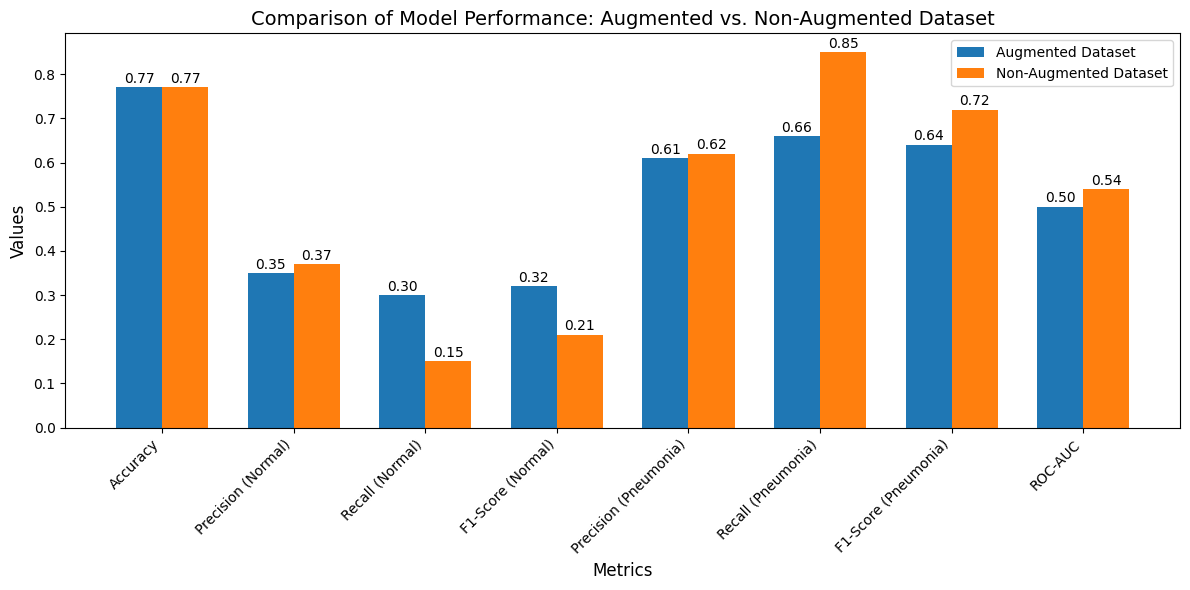

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for comparison
metrics = ['Accuracy', 'Precision (Normal)', 'Recall (Normal)', 'F1-Score (Normal)',
           'Precision (Pneumonia)', 'Recall (Pneumonia)', 'F1-Score (Pneumonia)', 'ROC-AUC']
augmented = [0.77, 0.35, 0.30, 0.32, 0.61, 0.66, 0.64, 0.50]
non_augmented = [0.77, 0.37, 0.15, 0.21, 0.62, 0.85, 0.72, 0.54]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars1 = ax.bar(x - width/2, augmented, width, label='Augmented Dataset')
bars2 = ax.bar(x + width/2, non_augmented, width, label='Non-Augmented Dataset')

# Add labels, title, and legend
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Comparison of Model Performance: Augmented vs. Non-Augmented Dataset', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right', fontsize=10)
ax.legend()

# Add values on top of bars
for bar_group in [bars1, bars2]:
    for bar in bar_group:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Displaying Test Images with Predictions: Visualizing Model Performance on Pneumonia Detection

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


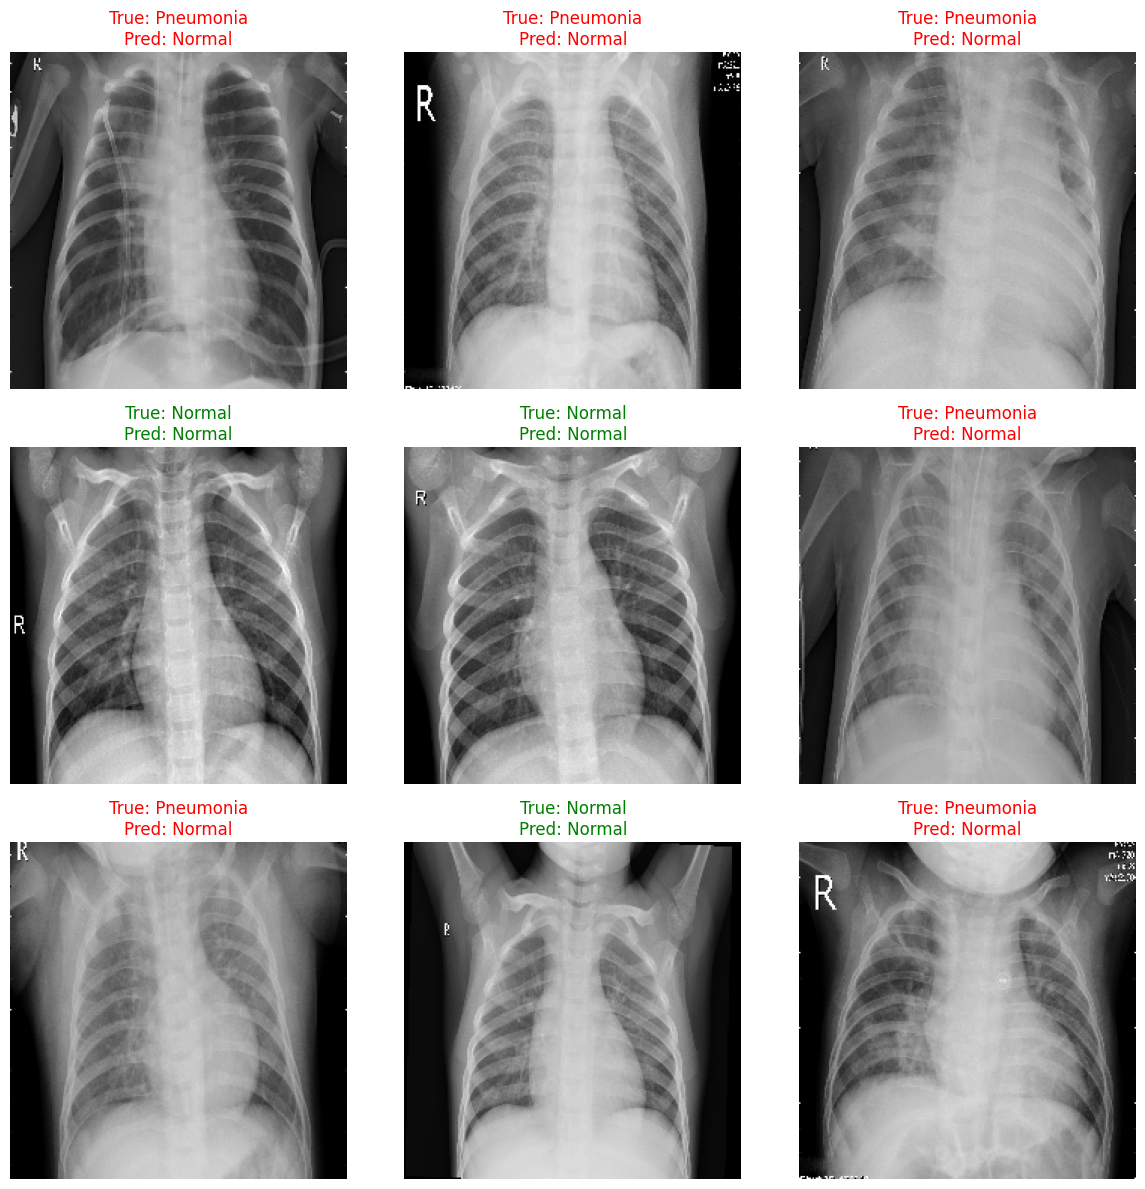

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of images and labels from the test dataset
test_images, test_labels = next(iter(test_data))

# Ensure the images are properly scaled for display
test_images = test_images * 255  # Scale back to original image range

# Use the model to predict
predictions = model.predict(test_images)

# Map predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)  # Assuming softmax output
true_labels = np.argmax(test_labels, axis=1)

# Class names
class_names = ['Normal', 'Pneumonia']

# Plot a few images with predictions
plt.figure(figsize=(12, 12))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[i].astype("uint8"))  # Convert to uint8 for correct image rendering
    plt.title(
        f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}",
        color="green" if true_labels[i] == predicted_labels[i] else "red",
    )
    plt.axis("off")

plt.tight_layout()
plt.show()
